In [5]:
import numpy as np                       # import a library called numpy - we reference it as 'np'
byte_order = 1                           # this means integers are encoded as little endian in our example. 
file = '3D_NNOESY_long_linear/ser'       # location of the Bruker serial file, 'ser'
with open(file, 'rb') as serial_file:    # method of opening the file. We now reference it as 'serial_file'
    if byte_order == 0:                  # byte order refers to big or little endian - a way 32 bit integers
                                         # are encoded. Don't worry. In this example, byte_order is 1.
                                         # we'll show you later how this is detected.
        raw_data = np.frombuffer(        # we read the file data into an 'np' vector called 'raw_data'
            serial_file.read(),          # this is the command to read it
            dtype='<i4'                  # this says 'read it as type big endian'
        )                                # close off the reading function
    elif byte_order == 1:                # or if the byte order is 1 - which it is for this example
                                         # lets read it as little endian
        raw_data = np.frombuffer(        # read into raw data
            serial_file.read(),          # the serial file
            dtype='>i4'                  # with little endian encoding
        )                                # and close off the reading function


In [6]:
data_length = len(raw_data)
num_points_per_fid = 2048
print(data_length/num_points_per_fid)

81600.0


In [7]:
fid = raw_data[0:2048]
reals = fid[0::2]
imags = fid[1::2]

fid = reals + 1.j*imags

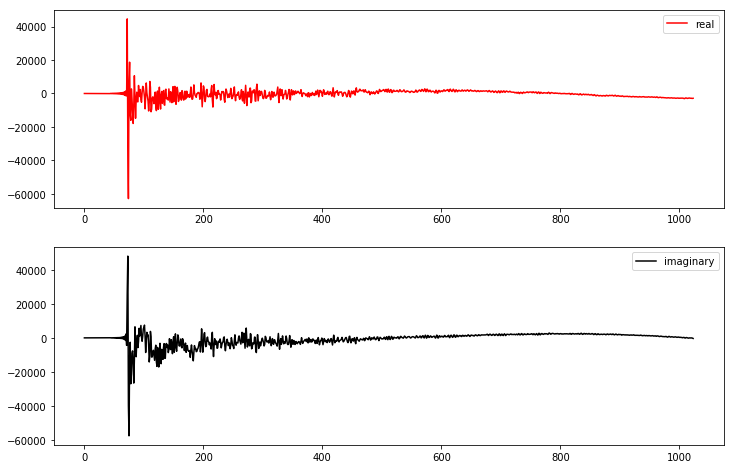

In [11]:
import matplotlib.pyplot as plt              # import plotting library as plt
plt.figure(figsize=(12,8))                   # make a figure. Size it 12 x 8. 
plt.subplot(2, 1, 1)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.real(fid),                       # plot the real part of fid. 
         c='r',                              # Colour it red ('r')
         label='real'                        # Label is 'real'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(2, 1, 2)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.imag(fid),                       # plot the imaginary part of fid. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary'                   # Label is 'imaginary'
        )
plt.legend()                                 # plot the legend (the label)

plt.show()                                   # show it!

In [15]:
def dd2g(dspfvs, decim):              # def defines a function called dd2g. It takes in two 
                                      # variables, dspfvs and decim. 

    dspdic = {                        # we make a python dictionary which maps dspfvs and decim
                                      # values to a grpdly value
        10: {
            2: 44.75,
            3: 33.5,
            4: 66.625,
            6: 59.083333333333333,
            8: 68.5625,
            12: 60.375,
            16: 69.53125,
            24: 61.020833333333333,
            32: 70.015625,
            48: 61.34375,
            64: 70.2578125,
            96: 61.505208333333333,
            128: 70.37890625,
            192: 61.5859375,
            256: 70.439453125,
            384: 61.626302083333333,
            512: 70.4697265625,
            768: 61.646484375,
            1024: 70.48486328125,
            1536: 61.656575520833333,
            2048: 70.492431640625,
            },

        11: {
            2: 46.,
            3: 36.5,
            4: 48.,
            6: 50.166666666666667,
            8: 53.25,
            12: 69.5,
            16: 72.25,
            24: 70.166666666666667,
            32: 72.75,
            48: 70.5,
            64: 73.,
            96: 70.666666666666667,
            128: 72.5,
            192: 71.333333333333333,
            256: 72.25,
            384: 71.666666666666667,
            512: 72.125,
            768: 71.833333333333333,
            1024: 72.0625,
            1536: 71.916666666666667,
            2048: 72.03125
            },

        12: {
            2: 46.,
            3: 36.5,
            4: 48.,
            6: 50.166666666666667,
            8: 53.25,
            12: 69.5,
            16: 71.625,
            24: 70.166666666666667,
            32: 72.125,
            48: 70.5,
            64: 72.375,
            96: 70.666666666666667,
            128: 72.5,
            192: 71.333333333333333,
            256: 72.25,
            384: 71.666666666666667,
            512: 72.125,
            768: 71.833333333333333,
            1024: 72.0625,
            1536: 71.916666666666667,
            2048: 72.03125
            },

        13: {
            2: 2.75,
            3: 2.8333333333333333,
            4: 2.875,
            6: 2.9166666666666667,
            8: 2.9375,
            12: 2.9583333333333333,
            16: 2.96875,
            24: 2.9791666666666667,
            32: 2.984375,
            48: 2.9895833333333333,
            64: 2.9921875,
            96: 2.9947916666666667
            }
        }

    return dspdic[dspfvs][decim]          # grpdly is returned based on dspfvs and decim values
                                          # in the dictionary

In [16]:
def remove_bruker_filter(data, grpdly):

    n = float(len(data))
    data = np.fft.fft(np.fft.ifftshift(data)) / n
    data = data * np.exp(2.j * np.pi * grpdly * np.arange(n) / n)
    data = np.fft.fftshift(np.fft.ifft(data)) * n
    skip = int(np.floor(grpdly + 2))    
    add = int(max(skip - 6, 0))           
    data[..., :add] = data[..., :add] + data[..., :-(add + 1):-1]
    data = data[..., :-skip]

    return data


In [20]:
# DECIM= 16 DSPFVS= 12 GRPDLY= 71.625

decim = 16
dspfvs = 12

grpdly = dd2g(dspfvs, decim)                        # set up grpdly
print(grpdly)                                       # prints 71.625

print(len(fid))                                     # print length of FID before filter removal
fid_adjusted = remove_bruker_filter(fid, grpdly)    # do the filter removal
print(len(fid_adjusted))                            # print length after filter removal


71.625
1024
951


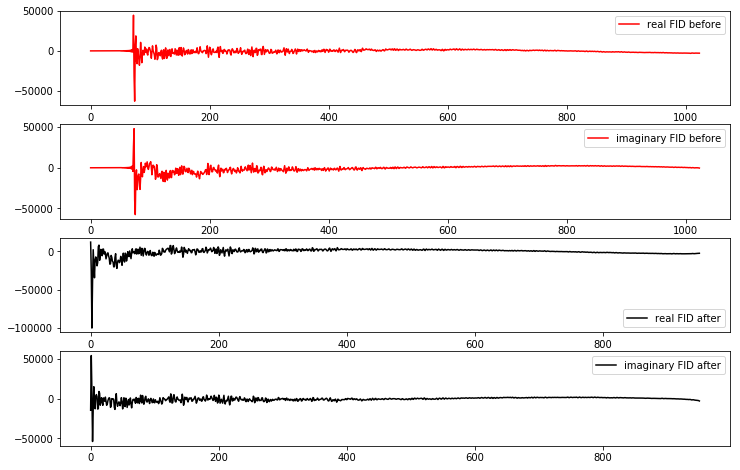

In [19]:
plt.figure(figsize=(12,8))                   # make a figure. Size it 12 x 8. 
plt.subplot(4, 1, 1)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.real(fid),                       # plot the real part of fid before. 
         c='r',                              # Colour it red ('r')
         label='real FID before'                  # Label is 'FID Before'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 2)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.imag(fid),                       # plot the real part of fid before. 
         c='r',                              # Colour it red ('r')
         label='imaginary FID before'                  # Label is 'FID Before'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 3)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.real(fid_adjusted),              # plot the real part of fid after adjustment. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='real FID after'                   # Label is 'FID after'
        )
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 4)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.imag(fid_adjusted),              # plot the real part of fid after adjustment. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary FID after'                   # Label is 'FID after'
        )
plt.legend()                                 # plot the legend (the label)


plt.show()                                   # show it!